## Multi Instrument Plot
This tool downloads and visualizes time-series data of various instruments of a selected spacecraft including solar energetic particle intensities, solar wind plasma and magnetic field data. 

Selected remote-sensing observations such as radio spectrograms or X-ray light curves are also available.

#### Import tools and display options
GOES manual satellite selection: check to manually pick GOES satellite during data loading. When left unchecked, the highest numbered satellite is picked automatically.

Averaging options: "Averaging" averages particle data (except L1 which has its own options), "MAG averaging" averages magnetic field and plasma/solar wind quantities, and "STIX/XRS averaging" averages SolO/STIX and GOES/XRS. 0 minutes averaging means original cadence.

STIX light travel time correction means that the data are time-shifted to a distance of 1 AU. Everything else is in local time of the spacecraft.

In [ ]:
import os
import datetime as dt
import matplotlib.pyplot as plt

from seppy.util import jupyterhub_data_path

import multi_inst_plots as m
from multi_inst_plots.other_tools import copy_fig_axs

In [ ]:
m.options.show()

#### Data directory

Define where to download files. Running this cell will set it to \<current directory\>/data, or if run on the project's JupyterHub server, set it to a common data folder in the base directory. Setting to None will use sunpy's default data directory. 

In [ ]:
m.options.path = f"{os.getcwd()}{os.sep}data"
m.options.path = jupyterhub_data_path(m.options.path)

#### Load data
Run this cell whenever spacecraft, instruments or dates are re-selected. Non-averaged data and metadata are returned should you want to use them for other purposes.

In [ ]:
data, metadata = m.load_data()

Loading Parker Solar Probe data for range: 2022-03-14 00:00:00 - 2022-03-16 23:59:59
Loading SolO/STIX... (dataset 1/8)
Loading GOES/XRS... (dataset 2/8)
Fetching GOES-17 XRS data for 2022-03-14 00:00:00 - 2022-03-16 23:59:59


Files Downloaded:   0%|          | 0/3 [00:00<?, ?file/s]

Loading EPI-Hi... (dataset 3/8)
Loading EPI-Lo PE... (dataset 4/8)
Loading EPI-Lo IC... (dataset 5/8)
Loading FIELDS/RFS... (dataset 6/8)
Loading FIELDS/MAG... (dataset 7/8)
Loading SPC and SPAN-i... (dataset 8/8)
Data loaded!


#### Energy channel selection
Print out energy ranges for each channel and choose the indices of the channels you want to include in your plot with `m.energy_channel_selection()`. Use `m.range_selection()` for easy range selection. Alternatively, you can choose them manually with the widgets: click+drag cursor or Shift+click for ranges, Ctrl/Cmd + click for individual channels.

In [ ]:
# Display energy channel ranges and corresponding selection widgets
m.energy_channel_selection()

,EPI-Lo PE Electrons,EPI-Lo IC Protons,EPI-Hi HET Electrons,EPI-Hi HET Protons
0,59.298397 keV,23.231127 keV,0.4 - 0.5 MeV,6.7 - 8.0 MeV
1,81.38768 keV,26.261353 keV,0.5 - 0.6 MeV,8.0 - 9.5 MeV
2,124.20447 keV,28.549295 keV,0.6 - 0.7 MeV,9.5 - 11.3 MeV
3,189.68501 keV,31.488613 keV,0.7 - 0.8 MeV,11.3 - 13.5 MeV
4,289.51932 keV,34.957027 keV,0.8 - 1.0 MeV,13.5 - 16.0 MeV
5,545.5552 keV,39.60269 keV,1.0 - 1.2 MeV,16.0 - 19.0 MeV
6,NaN,45.736465 keV,1.2 - 1.4 MeV,19.0 - 22.6 MeV
7,NaN,53.309242 keV,1.4 - 1.7 MeV,22.6 - 26.9 MeV
8,NaN,63.36658 keV,1.7 - 2.0 MeV,26.9 - 32.0 MeV
9,NaN,76.54353 keV,2.0 - 2.4 MeV,32.0 - 38.1 MeV


In [ ]:
# Pass e.g. low_e_start=0, low_p_stop=24, low_p_step=3, high_p_start=5 as arguments. Not every argument is required, 
# and the ordering doesn't matter either. Leave empty for a nice selection covering the full range.
m.range_selection() 

#### Define plot range

You can optionally define a smaller plotting range here. Values have to be valid datetime objects and within loaded time range. Set to None for 00:00 - 00:00.

In [ ]:
m.options.plot_start = None # dt.datetime(2022, 3, 15, 0, 0)
m.options.plot_end =  None # dt.datetime(2022, 3, 17, 0, 0)

#### Plot data
Figure and axes are returned for further tweaking capability.

Chosen energy channels:
EPI-Hi HET protons: (0, 2, 4, 6, 8, 10, 12, 14) , 8
EPI-Lo IC protons: (0, 4, 8, 12, 16, 20, 24, 28) , 8
EPI-Hi HET electrons: (0, 3, 6, 9, 12, 15, 18) , 7
EPI-Lo PE electrons: (0, 1, 2, 3, 4, 5) , 6
Plotting Parker Solar Probe data for timerange 2022-03-14 00:00:00 - 2022-03-16 23:59:59


2025-06-30 15:15:00 - sunpy - INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]


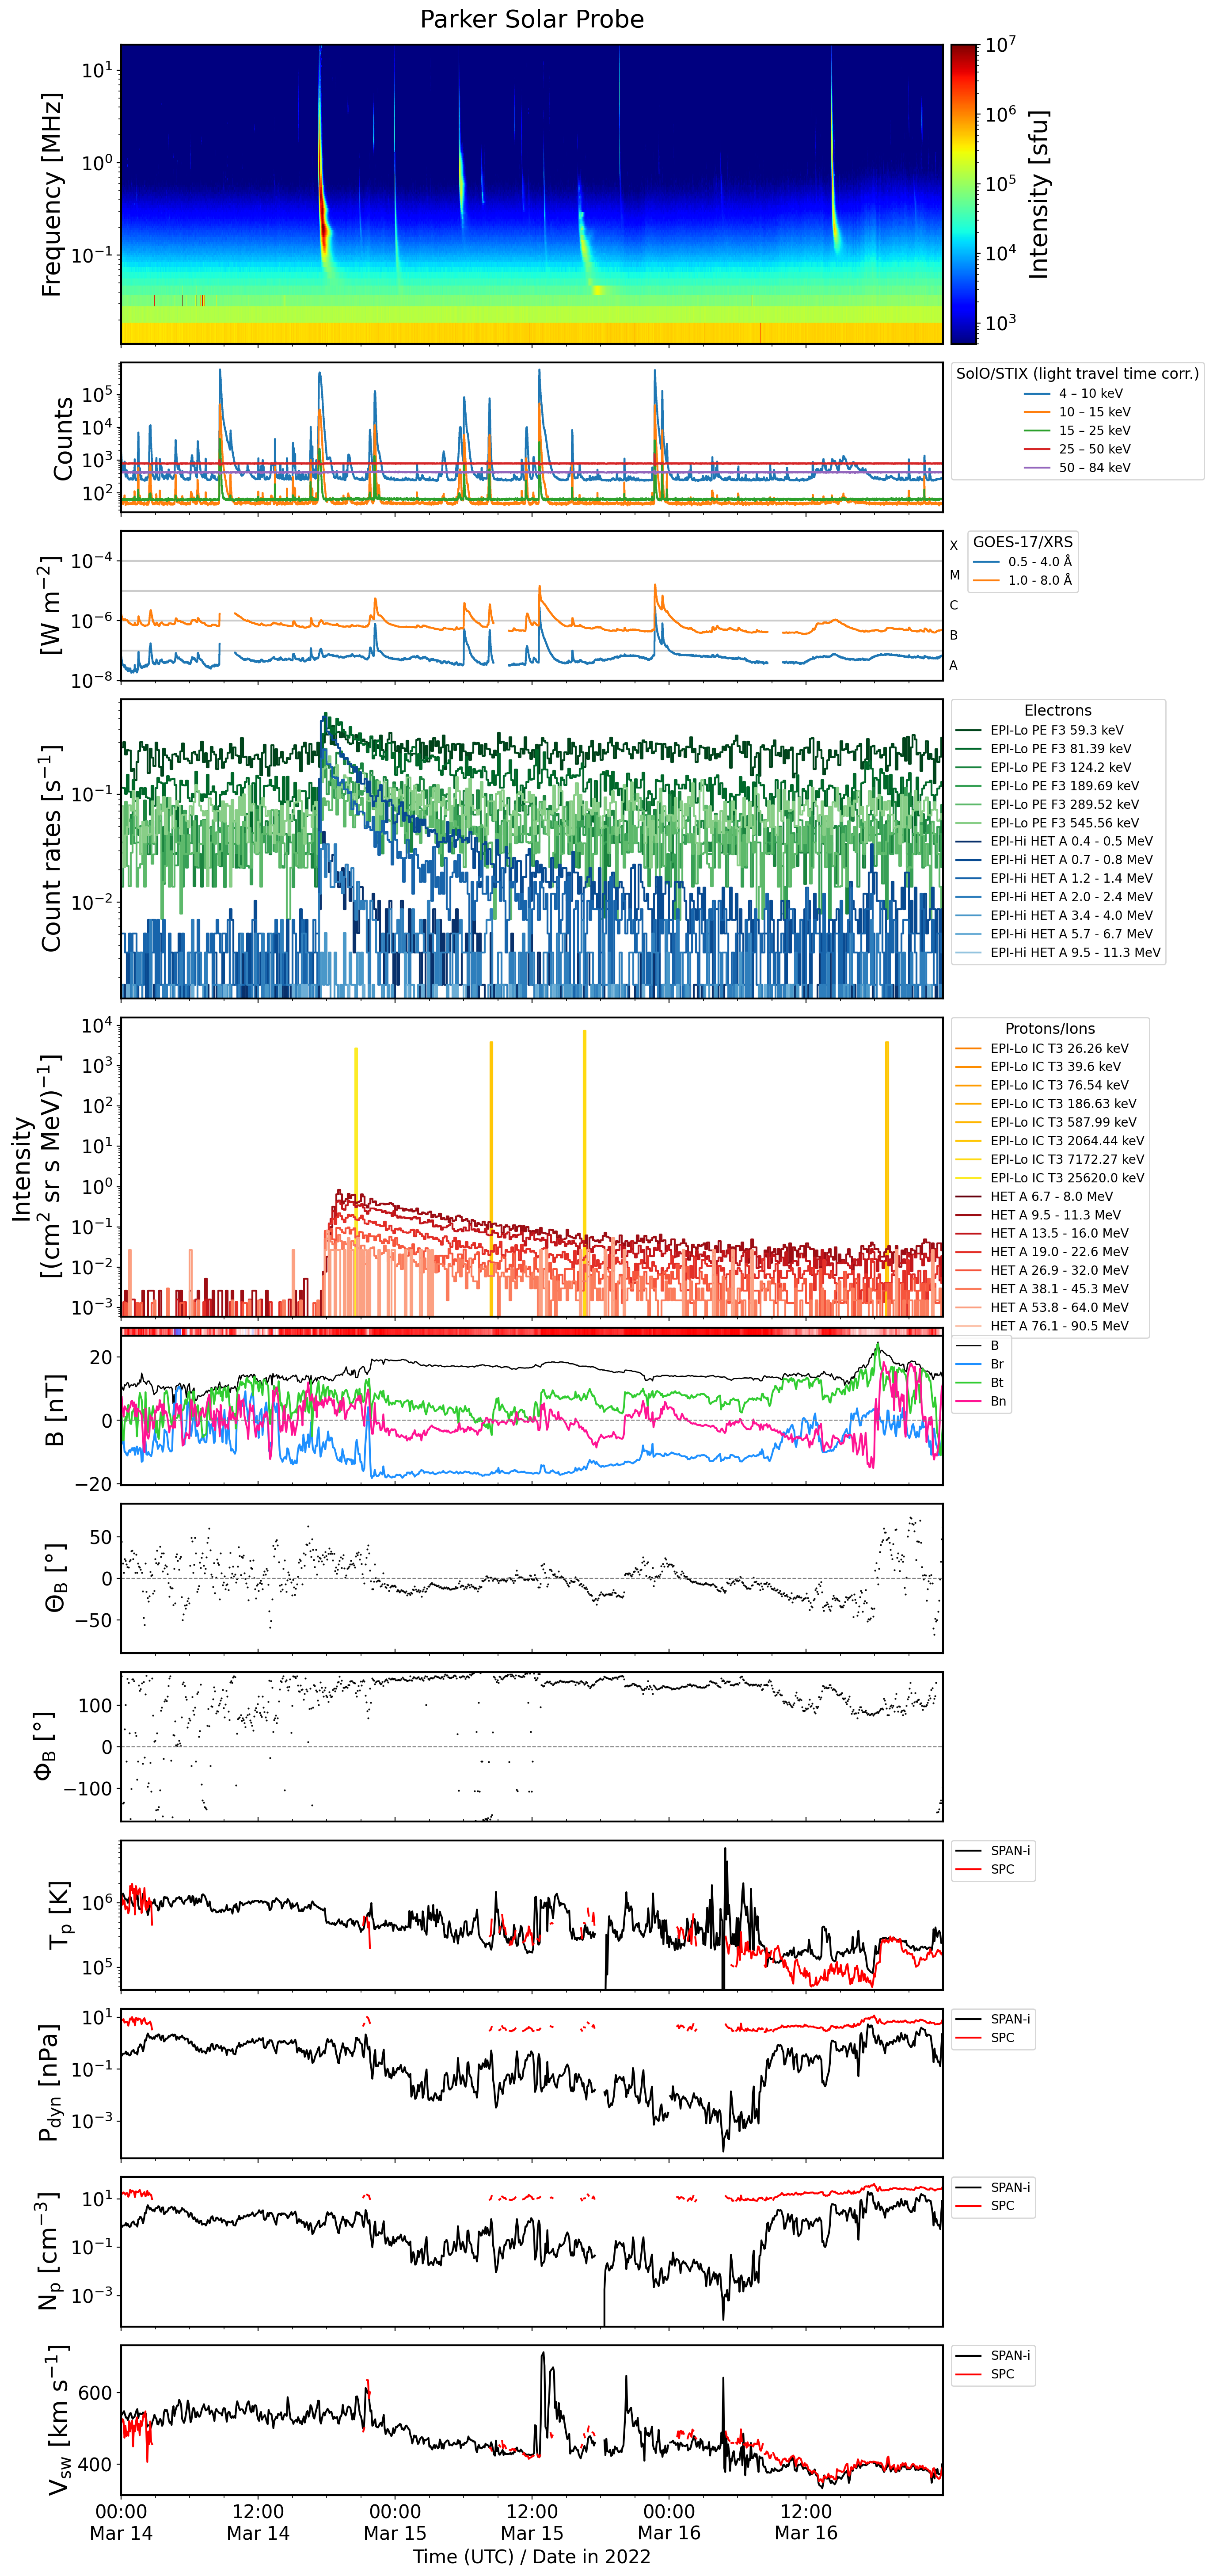

In [ ]:
fig, axs = m.make_plot()

## Edit the figure
For example, add a vertical line at a given datetime or a red-shaded region in the 9th panel.

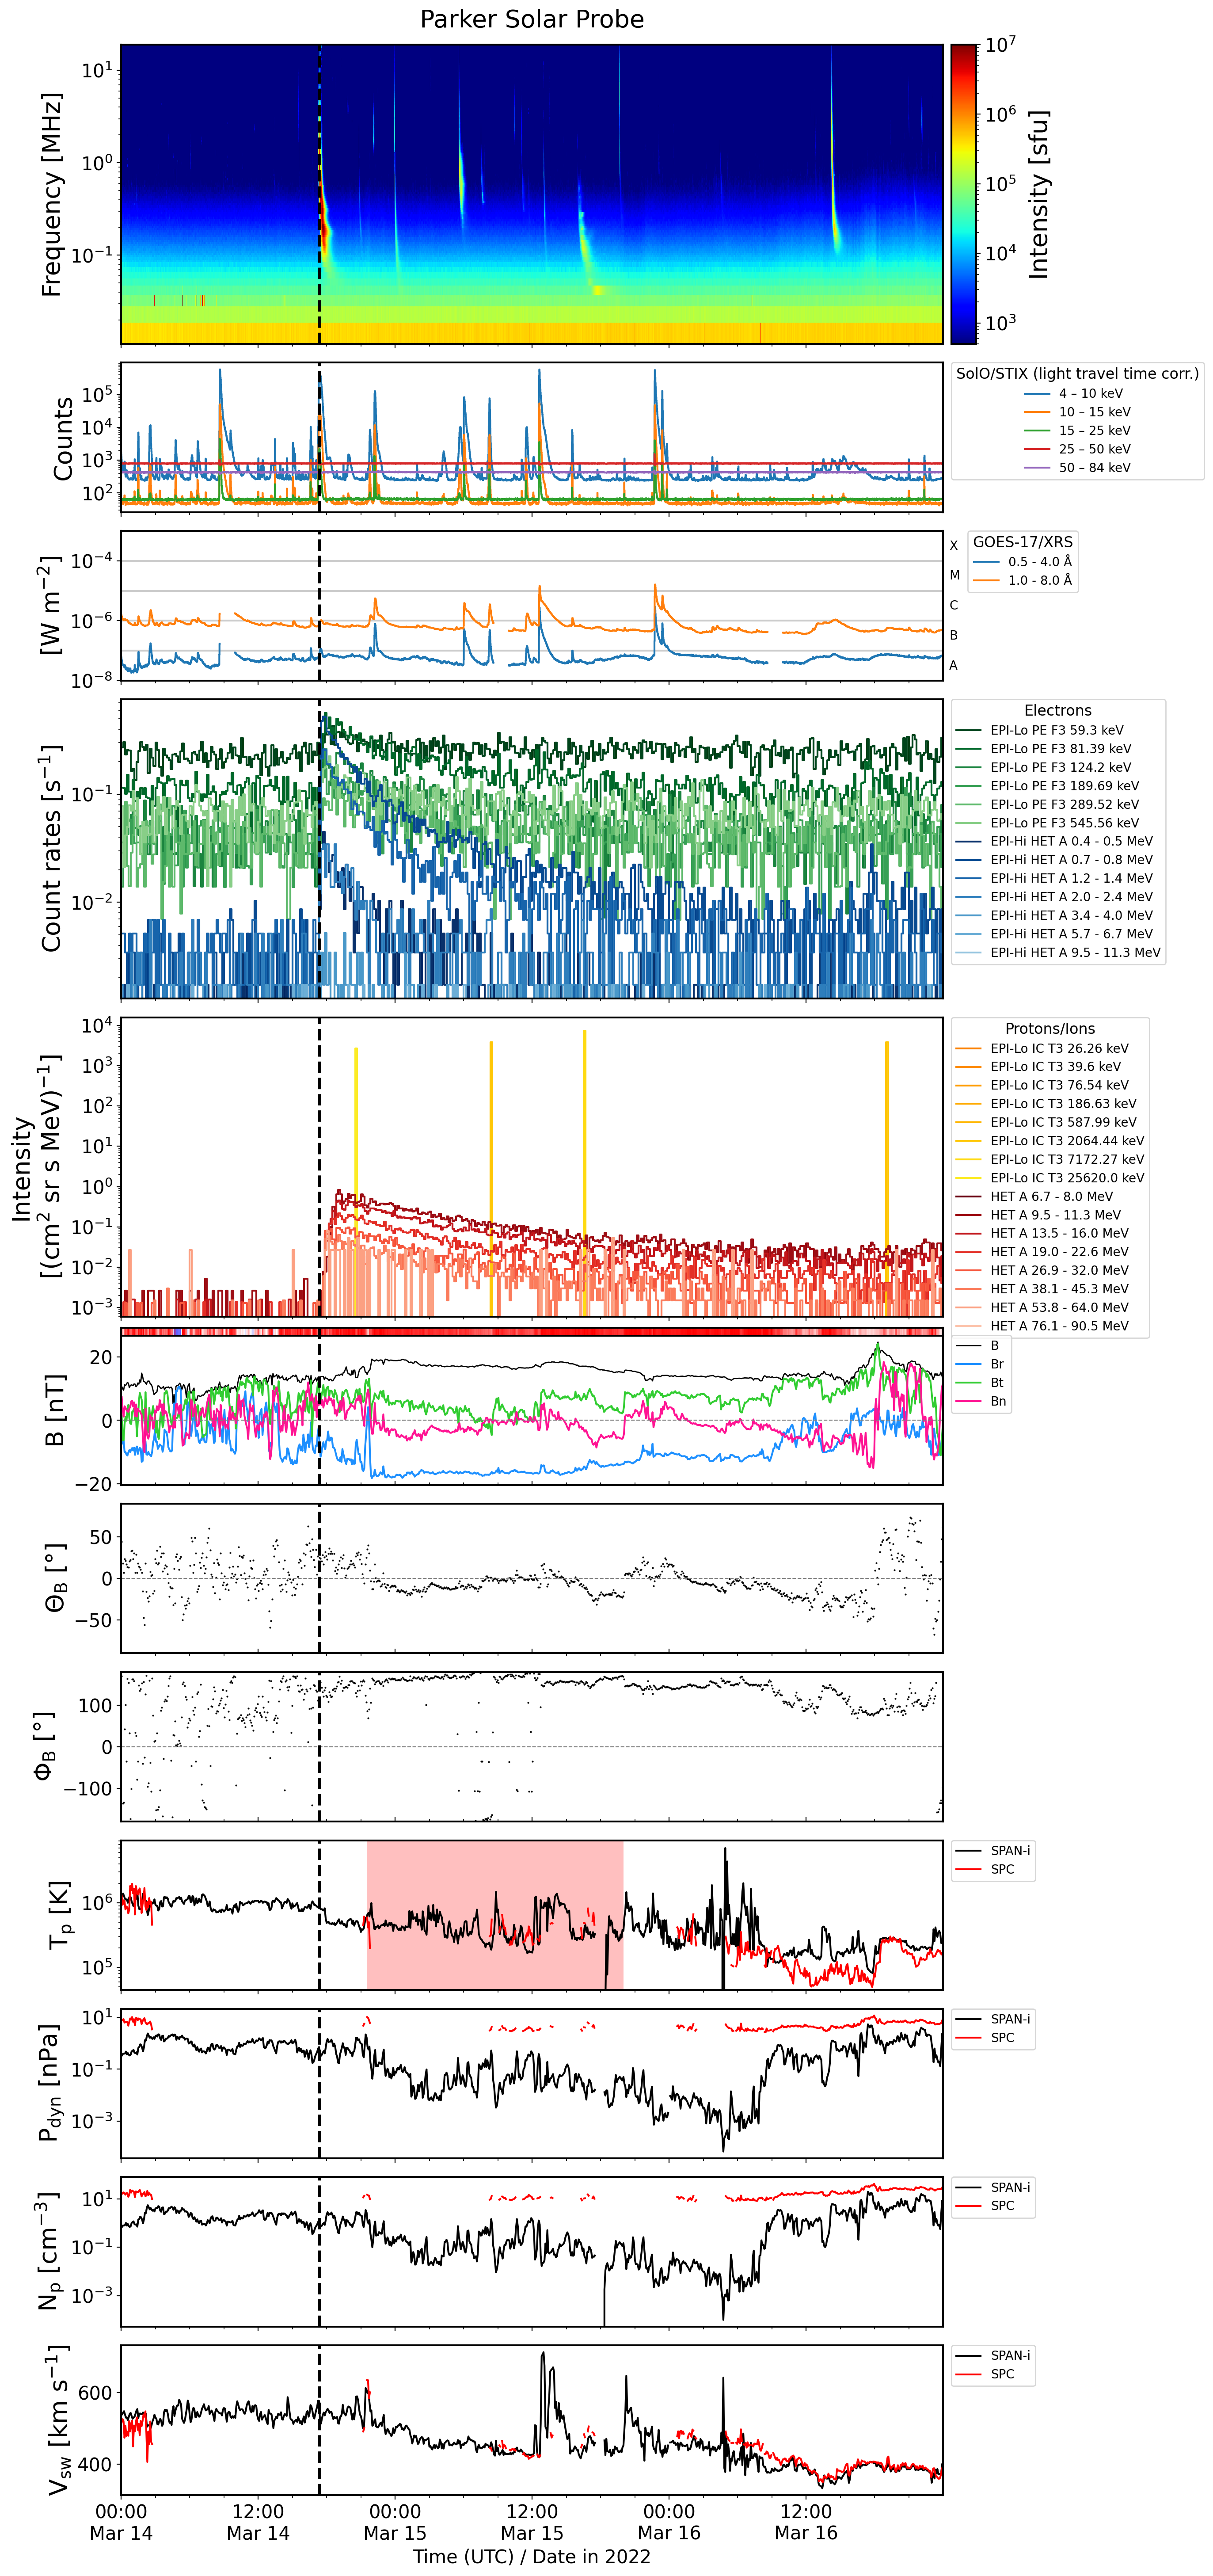

In [ ]:
# make a copy of the figure; don't change
fig_copy, axs_copy = copy_fig_axs(fig)

# vertical line 
time_vline = dt.datetime(2022, 3, 14, 17, 20)  # time format is YYYY, MM, DD, HH, SS
for ax in axs_copy:
    ax.axvline(time_vline, 
               linestyle="--",  # available line styles are '-', '--', '-.', ':'
               linewidth=2.5,
               color="black")

# shaded region in 9th panel (counting starts with 0)
cell_shade = 8
starttime_shade = dt.datetime(2022, 3, 14, 21, 30)
endtime_shade = dt.datetime(2022, 3, 15, 20, 00)
axs_copy[cell_shade].axvspan(starttime_shade, 
                             endtime_shade,
                             alpha=0.25,  # alpha value of the shading from 0.0 to 1.0 
                             facecolor="red", 
                             edgecolor=None,  # color of boundary lines
                             linestyle="-")  # linestyle only effective if edgecolor is defined  

# show updated figure; don't change
fig_copy

### Saving figures

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar). Alternatively, run the following cell.

In [ ]:
fig_copy.savefig("SEP_multi-instrument_plot.png", bbox_inches="tight")